In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

# EDA of Carvana Data

In [65]:
carvana = pd.read_csv('datasets/carvana_cleaned.csv')
pd.set_option('display.max_columns', None)
carvana.head()

,url,id,make,model,price,year,type,status,mileage,trim,scraped_at,address,city,state,zip,mpg_city,mpg_hwy,cylinders_count,engine,horsepower,torque,fuel_type,drivetrain,color,transmission,doors,seats,vin,stock_number,curb_weight,msrp,displacement
0,https://www.carvana.com/vehicle/2004050,2004050,Nissan,Sentra,18990,2017,Sedan,Available,27633,S Sedan 4D,2021-10-09 13:10:07,14450 West Rd,Houston,TX,77041,27.0,37.0,4.0,"4-Cyl, 1.8 Liter",NaN,NaN,Gas,FWD,Silver,"Auto, CVT w/Xtronic",4,5,3N1AB7AP2HY321285,2001283529,2857.0,18975,NaN
1,https://www.carvana.com/vehicle/1834140,1834140,Nissan,Altima,17590,2015,Sedan,Available,55648,2.5 SV Sedan 4D,2021-10-09 13:10:10,1951 Morgan Rd,Bessemer,AL,35022,27.0,38.0,4.0,"4-Cyl, 2.5 Liter",NaN,NaN,Gas,FWD,Black,"Automatic, Xtronic CVT",4,5,1N4AL3AP6FC104658,2001064426,3206.0,25555,NaN
2,https://www.carvana.com/vehicle/2027280,2027280,Volkswagen,Jetta,19590,2019,Sedan,Available,43649,1.4T S Sedan 4D,2021-10-09 13:10:11,63 Pierce Rd,Winder,GA,30680,30.0,40.0,4.0,"4-Cyl, Turbo, 1.4 Liter",NaN,NaN,Gas,FWD,White,"Automatic, 8-Spd & Tiptronic",4,5,3VWC57BU8KM127308,2001316091,2970.0,20240,1.4
3,https://www.carvana.com/vehicle/1834450,1834450,Nissan,Versa,16590,2019,Sedan,Available,31887,S Sedan 4D,2021-10-09 13:11:19,1123 Cantrell Sansom Rd,Blue Mound,TX,76131,27.0,36.0,4.0,"4-Cyl, 1.6 Liter",109.0,107.0,Gas,FWD,Black,"Manual, 5-Spd",4,5,3N1CN7AP5KL822420,2001053561,2395.0,13385,1.6
4,https://www.carvana.com/vehicle/2004398,2004398,Chevrolet,Cruze,18590,2018,Sedan,Available,19363,LS Sedan 4D,2021-10-09 13:11:21,1925 Concord Pkwy S,Concord,NC,28027,29.0,40.0,4.0,"4-Cyl, Turbo, 1.4 Liter",153.0,177.0,Gas,FWD,Silver,"Automatic, 6-Spd",4,5,1G1BC5SM7J7198252,2001287434,NaN,21995,1.4


In [66]:
carvana.shape

(329, 32)

# Analysis

I am sharing the belief that every dataset is cleansed and prepared for _something_, some purpose. 
Using this dataset, I will try to answer some questions about Carvana data, namely:

- what affects the price of a car the most (my guess it's the year, we will see)
- which brand ("make") has the highest depreciation rate, and which has the lowest (I assume that would be German and Japaneese cars respectively)
- what brand has the biggest average engine displacement (some American car brand for sure)
- what car brand is the most often occuring in this dataset (hard to say)
- does a transmission type affects a price of a car (there is a belief that no one can drive stickshift, therefore they go for cheap)
- is there a relationship between drivetrain and a body style (for example, if it's FWD, that's most likely a sedan, RWD is either a truck or a coupe)
- what is the most common color of the car (gotta be black)
- what is the cheapest and the most expensive car in this dataset for each brand
- which car brand and model has the highest MPG (most likely Japanese)

# Correlation matrix & heatmap

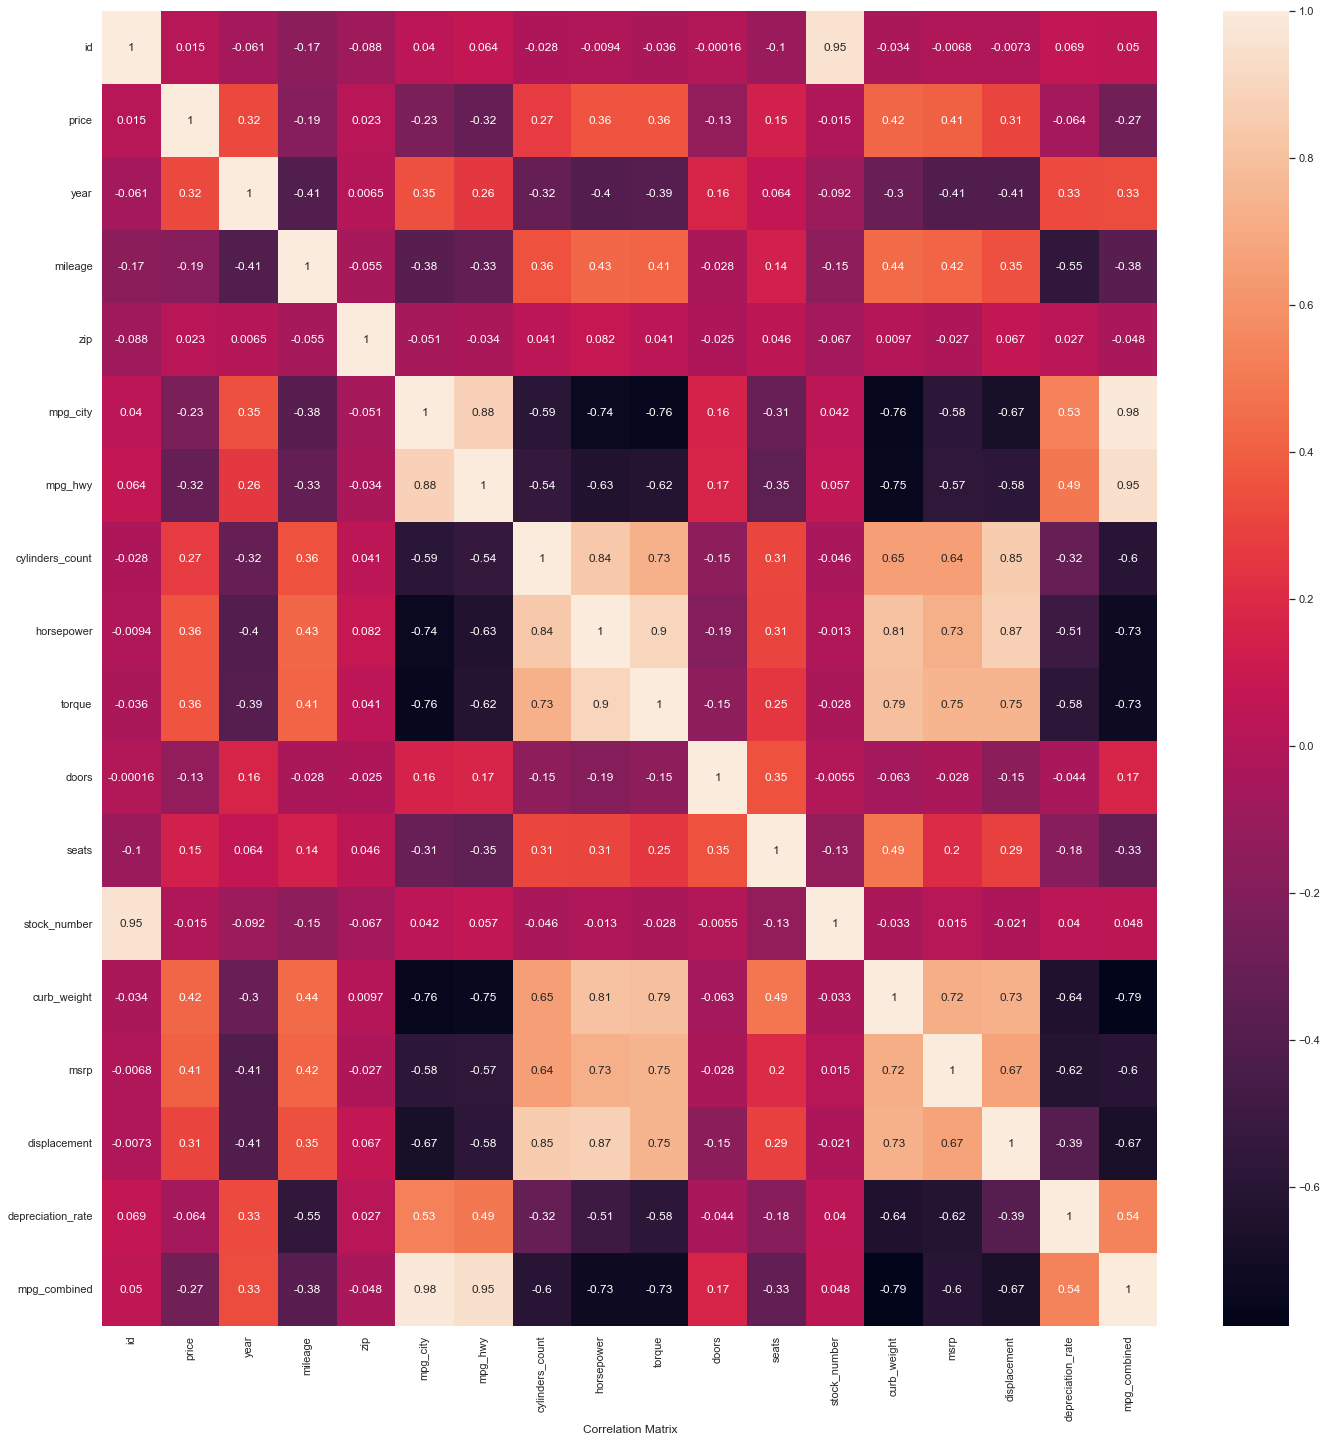

In [119]:
sns.heatmap(carvana.corr(), annot =True )
sns.set(rc = {'figure.figsize':(20,20)})
plt.tight_layout()
plt.xlabel('Correlation Matrix')
plt.yticks(rotation=0)
plt.show()

<u>**Linear**</u> correlations (negative or positive):
- stock number & ID (makes sense, they have to be somehow related)
- displacement & City MPG. The more displacement, the less is City MPG
- torque & City MPG. The more the torque, the less is City MPG
- cylinders count & City MPG, the more the cylinders count, the less it the City MPG
- horsepower & City MPG, the more the horsepower, the less is City MPG
- horsepower, torque, displacement, and cylinder count have similar relationship to Hwy MPG.

- horsepower affects msrp strongly positively (0.73), while it doesn't affect the price that strong (0.36). **Do high-HP cars depreciate fast?** 
- curb weight has some weak effect on MPG (-0.4). The heavier the car, the less is the MPG.
- year has some weak effect on mileage (-0.4). The newer the car, the lesser is the mileage.
- mileage has very weak effect on price (-0.19). More miles affects the car price, but not as strong as year or horsepower.

### Limitations:

Pearson's Correlation Coefficient shows only how strong one parameter related to another linearly. In other words, if the relationship is not linear (for example, U-shaped), it might not be representing this relationship well. 

Therefore, to better see the relationships, I will use a seaborn.pairplot.

Before doing so, I would reduce the number of numerical columns since a lot of them are tightly related and would contaminate the graph
(speaking of **torque**-**horsepower**-**displacement**)

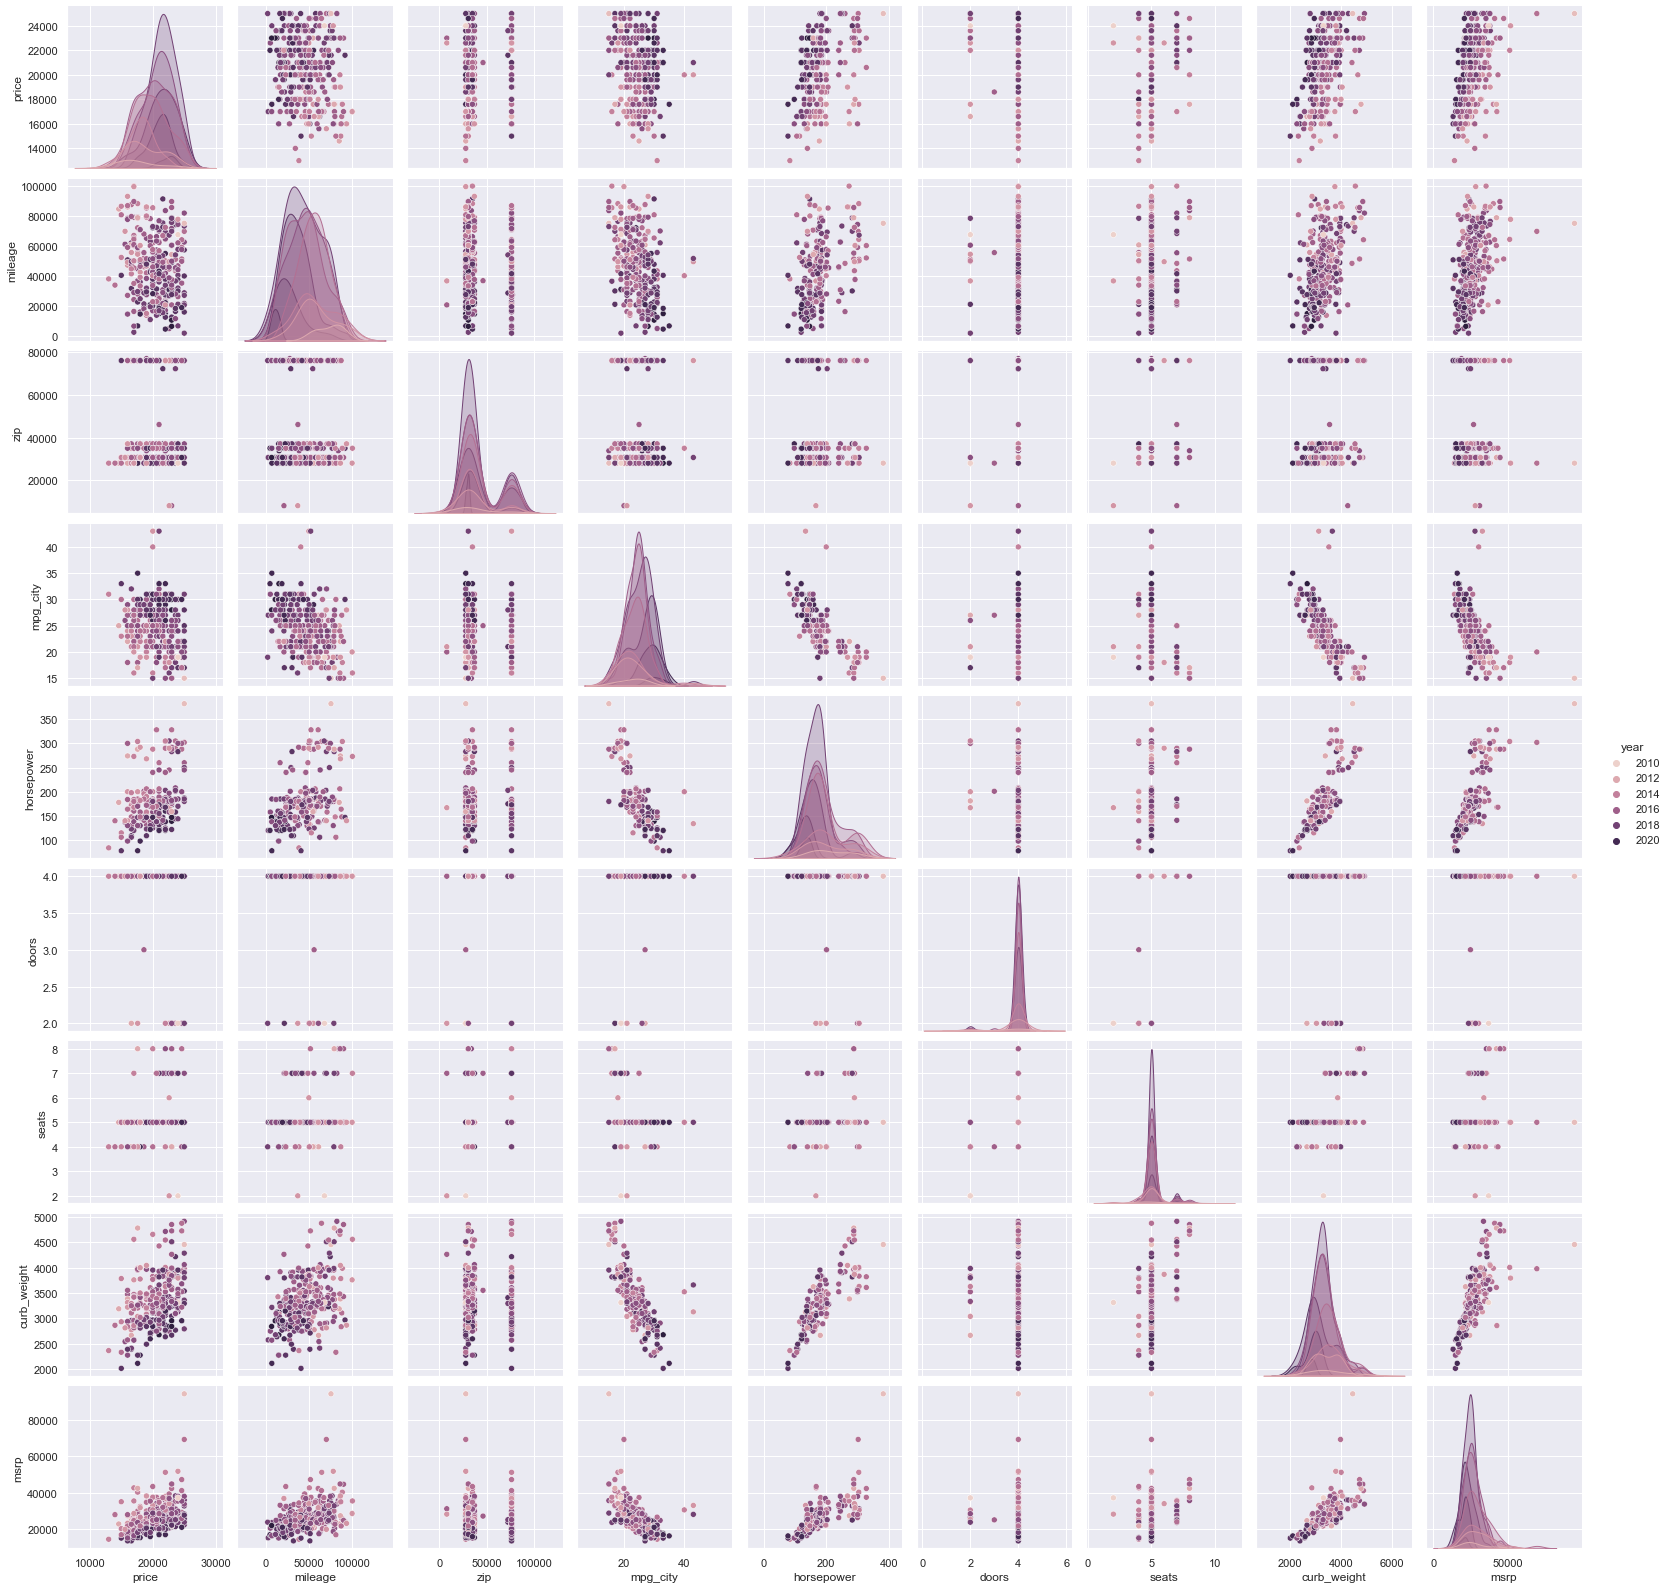

In [68]:
carvana_reduced = carvana.drop(['mpg_hwy', 'cylinders_count', 'torque', 'displacement', 'id', 'stock_number'], axis=1)

sns.pairplot(carvana_reduced, hue='year')

There are some conclusions to be made from this plot:

- **seems like more recent cars have lesser average curb weight?**
- mileage alone indeed has no visible relationship with price (wow!)
- MPG has a very clear linear relationship with curb weight
- **seems like cars made in 2016-2018 have the highest average mileage?**
- price is somewhat affected by the horsepower

# What affects the price of a car?

Based on acquired data, those are all linear correlations between columns sorted from positive to negative:

In [69]:
carvana.corr()['price'].sort_values(ascending=False)

price              1.000000
curb_weight        0.422880
msrp               0.405682
horsepower         0.362221
torque             0.361491
year               0.321102
displacement       0.305637
cylinders_count    0.268525
seats              0.146227
zip                0.022705
id                 0.015417
stock_number      -0.015312
doors             -0.131636
mileage           -0.185601
mpg_city          -0.228736
mpg_hwy           -0.318230
Name: price, dtype: float64

However, this output needs to be slightly modified. 

We don't need **price**, since correlation with itself will always be 1.

**id** and **stock_number** are useless (they also show no correlation whatsoever, which is expectable)

Lastly, we are interest what contributes to the price the most, and not the sign of this correlation.

Therefore:


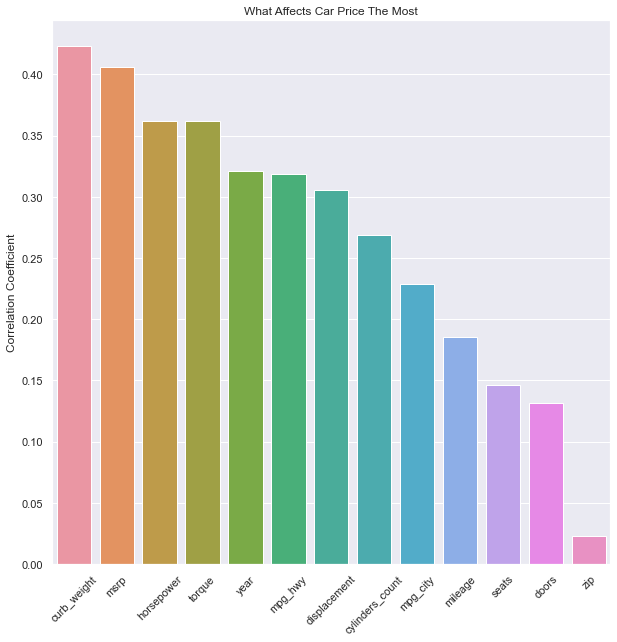

In [70]:
price_affect = abs(carvana.corr()['price']).sort_values(ascending=False)

price_affect = pd.DataFrame(price_affect).transpose()
price_affect.drop(['price', 'id', 'stock_number'], axis=1, inplace=True)

fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(data=price_affect)
ax.set_xticklabels(price_affect.columns, rotation = 45)
ax.set_title("What Affects Car Price The Most")
ax.set_ylabel('Correlation Coefficient')
plt.show()

### Conclusions:
- the most affecting factor is **MSRP**. The more expensive the car from the factory, the more expensive after it will be
- surprisingly, second & third place belong to **horsepower** and **torque**. People _love_ gaz guzzlers and are ready to pay more for them!
- next goes the **year**, followed by **gas mileage on a highway**. Give me the horsepower, but make it efficient
- an odometer reading, **mileage**, is on the 9th place. I have a hypothesis that mileage has more effect on same-year cars, but might not be as important for the price across the board

### Limitations:

- there are other factors that greatly affect the cost of the car. For example, mechanical/electrical problems with this particular year/model can drop the price significantly, if the car is notorius for breaking down on the go. Type of terrain and road condition matters (FWD and AWD cars would be predominant somewhere in Alaska, whilst convertibles are typically sell well in Florida and California). Parts availablilty takes its toll as well. 

## Transmission type and Car Cost

Transmission type didn't make it to the graph because it's a categorical feature and there cannot be no linear dependency. However, the question is still interesting:
whether stickshift cars are less expensive than automatic transmission cars. In order to determine that, we have to first divide cars into two groups by creating a column 'transmission_type':

In [71]:
carvana['transmission_type'] = np.where(carvana.transmission.str.contains('Auto'), 'automatic', 'manual')

Some cars do not contain 'Auto' in transmission, but they are not manual:

In [72]:
carvana.loc[carvana['transmission'].str.contains('Fixed')]

,url,id,make,model,price,year,type,status,mileage,trim,scraped_at,address,city,state,zip,mpg_city,mpg_hwy,cylinders_count,engine,horsepower,torque,fuel_type,drivetrain,color,transmission,doors,seats,vin,stock_number,curb_weight,msrp,displacement,transmission_type
94,https://www.carvana.com/vehicle/1997725,1997725,Chevrolet,Volt,20590,2017,Hatchback,Available,53327,LT Hatchback 4D,2021-10-09 13:19:13,1925 Concord Pkwy S,Concord,NC,28027,NaN,NaN,NaN,Voltec Electric Drive,149.0,294.0,Electric,FWD,Blue,Single-Speed Fixed Gear,4,5,1G1RC6S54HU216764,2001282328,3543.0,34095,NaN,manual
243,https://www.carvana.com/vehicle/1894483,1894483,Chevrolet,Spark EV,13990,2015,Hatchback,Available,34096,2LT Hatchback 4D,2021-10-09 13:32:44,1925 Concord Pkwy S,Concord,NC,28027,NaN,NaN,NaN,Electric Motor,140.0,327.0,Electric,FWD,Silver,Single-Speed Fixed Gear,4,4,KL8CL6S01FC818678,2001164558,2866.0,27885,NaN,manual
256,https://www.carvana.com/vehicle/2003493,2003493,Chevrolet,Volt,14990,2014,Sedan,Available,86791,Sedan 4D,2021-10-09 13:33:16,63 Pierce Rd,Winder,GA,30680,NaN,NaN,NaN,Voltec Electric Drive,NaN,NaN,Electric,FWD,Gray,Single-Speed Fixed Gear,4,4,1G1RE6E42EU169162,2001293493,3786.0,34995,1.4,manual


let's exclude them from 'manual' group:

In [73]:
carvana.loc[carvana['transmission'].str.contains('Fixed'), 'transmission_type'] = 'other'

Let's see the average price for each group:

In [74]:
carvana.groupby(['transmission_type'])['price'].mean()

transmission_type
automatic    20640.980392
manual       18740.000000
other        16523.333333
Name: price, dtype: float64

Seems like the mean price for the manual is a little lower than for the automatic transmission group. Let's plot it:

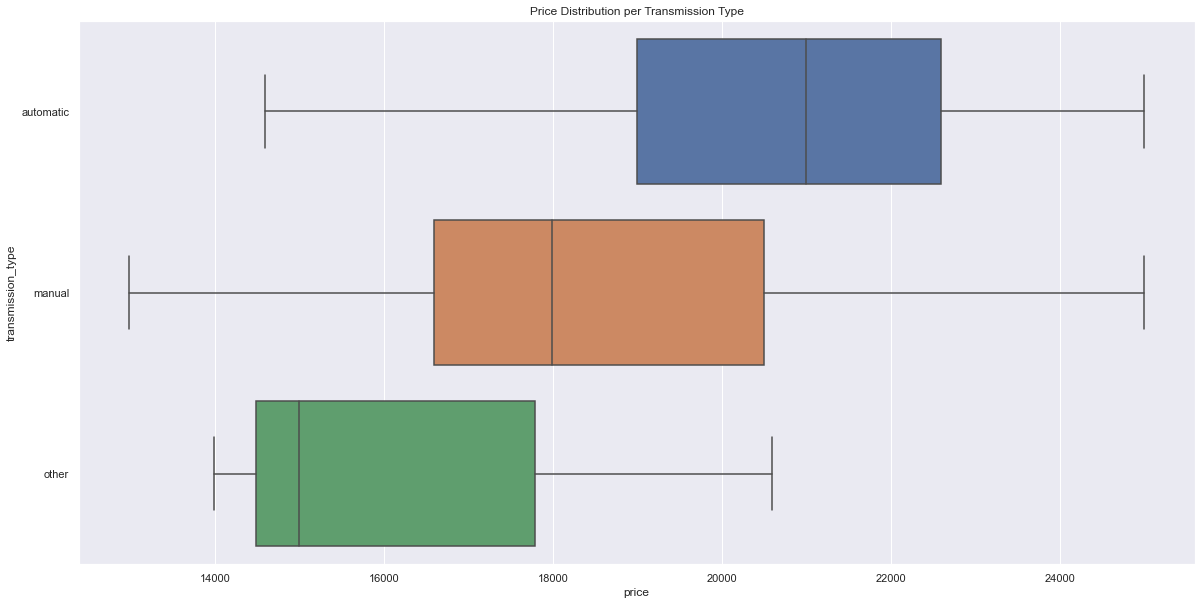

In [75]:
plt.figure(figsize=(20, 10))
plt.title('Price Distribution per Transmission Type')
sns.boxplot(x='price', y='transmission_type', data=carvana)
plt.show()

We can see that even though the max price for manual and automatic transmission cars is equal (perhaps a new car), min prices show a significant difference. The average price of manual transmission car is lower than the average price of an automatic transmission car *in* *this* *dataset*. 

Another quick check I want to perform is to see if there are any car _models_ that go both in automatic and manual options. If so, what would be mean prices for each of those groups? 

In [76]:
manual_models = set(carvana[carvana.transmission_type == 'manual']['model'])
automatic_models = set(carvana[carvana.transmission_type == 'automatic']['model'])
dual_models = manual_models.intersection(automatic_models)

In [77]:
dm = carvana[carvana.model.isin(dual_models)].sort_values(by=['year'])
dm.groupby(['transmission_type'])['price'].mean()

transmission_type
automatic    19106.666667
manual       18461.428571
Name: price, dtype: float64

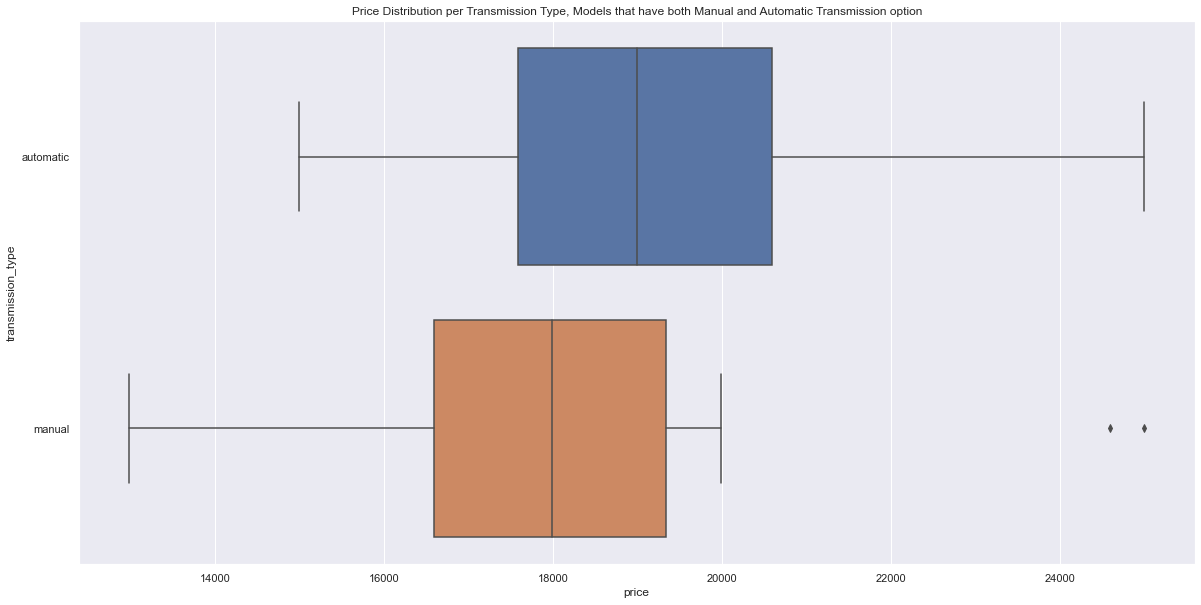

In [78]:
plt.figure(figsize=(20, 10))
plt.title('Price Distribution per Transmission Type, Models that have both Manual and Automatic Transmission option')
sns.boxplot(x='price', y='transmission_type', data=dm)
plt.show()

Even though we have some outliers in this case (they do not comply with 1.5 IQR rule) and both average prices went down a bit, the automatic transmission vehicle average price in these groups is still higher than the manual transmission vehicle. 

Again, this conclusion is drawn _only_ for this particular dataset. 

### Conclusion:
Stickshift cars tend to be cheaper than automatic transmission cars. 

What causes manual transmission cars to be cheaper? 

- one the most obvious reason: it takes some skills to drive a stickshift car without it dying on the road, while an automatic transmission doesn't take any skill to drive. 
- making a manual transmission is cheaper than making an automatic one

# Depreciation Rate Analysis

First of all, let's determine Depreciation. 

Depreciation is a loss of an asset's value over time, can be described by:

$$Future Value = Initial Value \times (1 + \frac{r}{100})^n $$

where _r_ is annual depreciation rate in %, and _n_ is a number of years.

I will use current car price as a _Future_ _Value_, and MSRP as an _Initial_ _Value_, in order to get the depreciation rate r:

$$r=(\sqrt[n]{\tfrac{Future Value}{Initial Value}} -  1) \times 100$$

In [79]:
# Feature Engineering: calculating Depreciation Rate column:
carvana['depreciation_rate'] = 100*((carvana.price/carvana.msrp)**(1/(2021-carvana.year)) - 1)
carvana.head()

,url,id,make,model,price,year,type,status,mileage,trim,scraped_at,address,city,state,zip,mpg_city,mpg_hwy,cylinders_count,engine,horsepower,torque,fuel_type,drivetrain,color,transmission,doors,seats,vin,stock_number,curb_weight,msrp,displacement,transmission_type,depreciation_rate
0,https://www.carvana.com/vehicle/2004050,2004050,Nissan,Sentra,18990,2017,Sedan,Available,27633,S Sedan 4D,2021-10-09 13:10:07,14450 West Rd,Houston,TX,77041,27.0,37.0,4.0,"4-Cyl, 1.8 Liter",NaN,NaN,Gas,FWD,Silver,"Auto, CVT w/Xtronic",4,5,3N1AB7AP2HY321285,2001283529,2857.0,18975,NaN,automatic,0.019757
1,https://www.carvana.com/vehicle/1834140,1834140,Nissan,Altima,17590,2015,Sedan,Available,55648,2.5 SV Sedan 4D,2021-10-09 13:10:10,1951 Morgan Rd,Bessemer,AL,35022,27.0,38.0,4.0,"4-Cyl, 2.5 Liter",NaN,NaN,Gas,FWD,Black,"Automatic, Xtronic CVT",4,5,1N4AL3AP6FC104658,2001064426,3206.0,25555,NaN,automatic,-6.035244
2,https://www.carvana.com/vehicle/2027280,2027280,Volkswagen,Jetta,19590,2019,Sedan,Available,43649,1.4T S Sedan 4D,2021-10-09 13:10:11,63 Pierce Rd,Winder,GA,30680,30.0,40.0,4.0,"4-Cyl, Turbo, 1.4 Liter",NaN,NaN,Gas,FWD,White,"Automatic, 8-Spd & Tiptronic",4,5,3VWC57BU8KM127308,2001316091,2970.0,20240,1.4,automatic,-1.618834
3,https://www.carvana.com/vehicle/1834450,1834450,Nissan,Versa,16590,2019,Sedan,Available,31887,S Sedan 4D,2021-10-09 13:11:19,1123 Cantrell Sansom Rd,Blue Mound,TX,76131,27.0,36.0,4.0,"4-Cyl, 1.6 Liter",109.0,107.0,Gas,FWD,Black,"Manual, 5-Spd",4,5,3N1CN7AP5KL822420,2001053561,2395.0,13385,1.6,manual,11.330460
4,https://www.carvana.com/vehicle/2004398,2004398,Chevrolet,Cruze,18590,2018,Sedan,Available,19363,LS Sedan 4D,2021-10-09 13:11:21,1925 Concord Pkwy S,Concord,NC,28027,29.0,40.0,4.0,"4-Cyl, Turbo, 1.4 Liter",153.0,177.0,Gas,FWD,Silver,"Automatic, 6-Spd",4,5,1G1BC5SM7J7198252,2001287434,NaN,21995,1.4,automatic,-5.452117


A lot of interesting things can be noticed in this newly calculated field. Some depreciation coefficients came out positive, how so? 

Car shortage of 2021 is the answer. The car model was so demanded that it was sold above the MSRP 2 years after.

There is another issue:

In [80]:
carvana[carvana.depreciation_rate == np.inf]

,url,id,make,model,price,year,type,status,mileage,trim,scraped_at,address,city,state,zip,mpg_city,mpg_hwy,cylinders_count,engine,horsepower,torque,fuel_type,drivetrain,color,transmission,doors,seats,vin,stock_number,curb_weight,msrp,displacement,transmission_type,depreciation_rate
52,https://www.carvana.com/vehicle/2027788,2027788,Hyundai,Accent,20990,2021,Sedan,Available,15036,SE Sedan 4D,2021-10-09 13:15:26,1925 Concord Pkwy S,Concord,NC,28027,33.0,41.0,4.0,"4-Cyl, 1.6 Liter",120.0,113.0,Gas,FWD,Black,"Automatic, IVT w/Shiftronic",4,5,3KPC24A67ME138620,2001289694,2679.0,17490,1.6,automatic,inf
56,https://www.carvana.com/vehicle/1994643,1994643,Toyota,Corolla,22990,2021,Sedan,Available,10702,LE Sedan 4D,2021-10-09 13:15:37,63 Pierce Rd,Winder,GA,30680,30.0,38.0,4.0,"4-Cyl, 1.8 Liter",139.0,126.0,Gas,FWD,Black,"Automatic, CVT",4,5,JTDEPMAE8MJ164437,2001270541,2955.0,21230,1.8,automatic,inf
212,https://www.carvana.com/vehicle/2032346,2032346,Kia,Soul,22990,2021,Wagon,Available,6569,S Wagon 4D,2021-10-09 13:29:19,63 Pierce Rd,Winder,GA,30680,28.0,33.0,4.0,"4-Cyl, 2.0 Liter",147.0,132.0,Gas,FWD,Red,"Automatic, i-VT",4,5,KNDJ23AU1M7777365,2001312803,2844.0,21865,2.0,automatic,inf


Depreciation rate of this car is infinity, and it happens if the car is made in 2021. 

2021-2021 is 0, 1/0 is undefined, but in a limit for denominator going to 0, the whole fraction is going to infinity. 

that's where the infinity comes form. Let's just get rid of those rows:

In [81]:
#Dropping rows in infinite values
depreciation = carvana.drop([carvana.index[52], carvana.index[56], carvana.index[212]])

# Groupby 'make', disp average
depreciation_list = depreciation.groupby(['make'])['depreciation_rate'].mean().sort_values(ascending=False)
depreciation_list

make
Kia              -0.809118
Mitsubishi       -0.991996
Toyota           -1.232257
Honda            -1.520212
Scion            -1.632485
Nissan           -1.789616
Subaru           -2.570929
Hyundai          -2.674911
Mazda            -3.161561
Volkswagen       -4.627316
Chevrolet        -5.894124
Mini             -5.900459
Dodge            -5.913079
Ford             -5.964724
Lincoln          -6.233614
Acura            -6.360531
Jeep             -6.996778
Chrysler         -7.099635
Lexus            -7.615918
Infiniti         -8.077640
Audi             -8.163777
Buick            -8.319116
Gmc              -8.985638
Bmw             -10.772949
Cadillac        -11.380622
Mercedes-benz   -14.051579
Name: depreciation_rate, dtype: float64

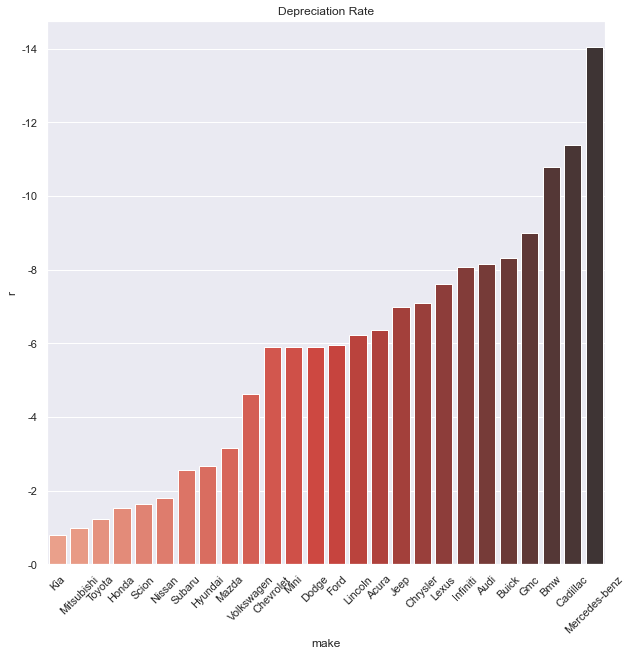

In [82]:
# you may need to rerun this cell twice since sometimes the graph does not display properly
depreciation_list = abs(pd.DataFrame(depreciation_list).transpose())

# plotting the graph
fig_d, ax_d = plt.subplots(figsize=(10, 10))
ax_d = sns.barplot(data=depreciation_list, palette="Reds_d")
ax_d.set_xticklabels(depreciation_list.columns, rotation = 45)
ax_d.set_title("Depreciation Rate")
ax_d.yaxis.set_major_formatter('-{x:1.0f}')
ax_d.set_ylabel('r')

plt.show()



This graph shows depreciation in car brands, from the slowest to the fastest depreciation rates.

What's interesting is Kia showing as the least depreciating car brand. Does it mean Kia is the most reliable car, beating Toyotas and Nissans? 

Not quite. While I don't personally have anything against Kias and Korean automotive industry, the Carvana dataset is relatively small. Alonside with that, Depreciation Rate is determined for each model. Usually, one car manufacturer will have models that built to last and therefore holding there value, and some will have poor engineering resulting into various problems, so their price will plummet soon after initial sale. I calculated the average, meaning we took the good and the bad. Because the dataset is only around ~300 rows, could it be possible we merely don't have many 'bad' models for Kia? 

Let's check what kind of Kias are in there:



In [83]:
carvana[carvana.make=='Kia']['model'].value_counts()

Forte       9
Optima      8
Soul        6
Rio         4
Sorento     3
Forte5      2
Sportage    2
Name: model, dtype: int64

Kia Forte, Forte5, Sorento and Soul are considered best Kia models, while Rio considered one of the worst. 
But there are only 4 Kia Rio, and many more quality Kia cars, therefore the depreciation rate tend to be higher per group compared to mean of depreciation rate for all models individually.
Lastly, the population size for each brand is quite small. Is it possible these Kias are scratched up less than other brands? Very possibly.

### Conclusion:
Japanese cars (Toyota, Honda, Nissan) occupy the beginning, while luxury cars occupy the back (BMW, Cadillac, Mercedes). What causes such a big difference?

- parts availablilty. Easy to get Japanese parts or locally made aftermarket replacement, German are often do not have aftermarket copies and have to be shipped from the overseas
- amount of electronics and complex nodes that can break. If it's a luxury car, every amenity inside tend to have a computer to better adapt to the owner. As we know, the more complex is a device, the more elements in it can possibly break over time. Old luxury cars are often not even fully fixed. 
- complexity of repair. German engineers do not want parking lot mechanics to service their cars, therefore simple routine repairs can cost a lot and can only be completed with professional tools, while Japanese cars generally require nothing like that. 

### Horsepower and depreciation

The hypothesis that high-hp cars are abused and therefore depreciate faster appeared somewhere above, let's test it as the final experiment with depreciation, but before we do that, we need to define what is High HP car? Let's see the span of horsepowers we have: 

In [84]:
carvana.horsepower.sort_values(ascending=False).unique()

array([382., 328., 305., 304., 302., 300., 292., 290., 288., 283., 274.,
       273., 268., 260., 250., 245., 240., 208., 206., 203., 201., 200.,
       198., 197., 196., 190., 189., 188., 187., 185., 184., 182., 181.,
       180., 179., 178., 176., 175., 173., 172., 170., 168., 167., 166.,
       164., 160., 159., 158., 155., 153., 152., 150., 149., 148., 147.,
       145., 144., 141., 140., 139., 138., 137., 134., 132., 130., 125.,
       124., 123., 122., 120., 115., 109., 106.,  98.,  84.,  78.,  nan])

Average car has around 180 hp. Let's say everything that >= 250 hp is a _high_ _HP_ car. To compare their depreciation rate, we need to mark high-powered cars from others. In order to do that, let's define a column 'is_highhp_car', where 'Yes' will mean it is a high HP car. 

In [85]:

depreciation['is_highhp_car'] = np.where(depreciation.horsepower>=250, 'Yes', 'No')

depreciation.groupby(['is_highhp_car'])['depreciation_rate'].mean()

is_highhp_car
No    -3.688326
Yes   -8.486219
Name: depreciation_rate, dtype: float64

However, this study design have one flaw:
it's a total mixture of all car types. Performance cars are not the only one to have big engines, trucks and vans have to have one due to high curb weight. 
In order to make it more fair, let's filter out only types that _can_ be a performance car:

In [86]:
depreciation.type.unique()

array(['Sedan', 'SUV', 'Hatchback', 'Coupe', 'Wagon', 'Truck',
       'Convertible', 'Minivan'], dtype=object)

In [87]:
depreciation_sedans = depreciation[depreciation.type.isin(['Coupe', 'Convertible', 'Sedan', 'Hatchback'])]

In [88]:
depreciation_sedans.groupby(['is_highhp_car'])['depreciation_rate'].mean()

is_highhp_car
No    -2.667528
Yes   -8.649300
Name: depreciation_rate, dtype: float64

The result is even more drastic compared to an overall population! 

Apparently, the answer is 'Yes' - at least for Carvana cars of 2021. That also make sense: high-powered cars are usually driven harshly, more miles = more the chance of some major part failing after wear and tear. Let's visually represent two depreciation curves: 

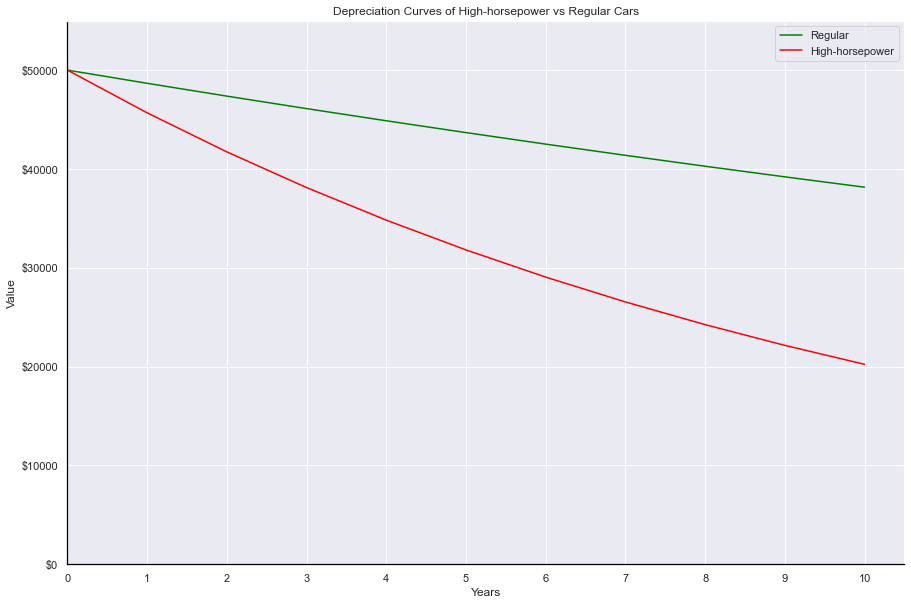

In [89]:
fig_dg, ax_dg = plt.subplots(figsize=(15, 10))
years = np.arange(0, 11, 1)
price_nonhp = 50000*(1-2.667528/100)**years
price_hp = 50000*(1-8.649300/100)**years

sns.axes_style('darkgrid')

ax_dg.plot(years, price_nonhp, color='green')
ax_dg.plot(years, price_hp, color='red')
ax_dg.legend(['Regular', 'High-horsepower'])
ax_dg.yaxis.set_major_formatter('${x:1.0f}')
ax_dg.set_title('Depreciation Curves of High-horsepower vs Regular Cars')
ax_dg.set_xlabel('Years')
ax_dg.set_ylabel('Value')
ax_dg.xaxis.set_ticks(np.arange(0, 11, 1))
ax_dg.set(xlim=[0, 10.5], ylim=[0, 55000])
ax_dg.spines['left'].set_visible(True)
ax_dg.spines['left'].set_color('black')
ax_dg.spines['bottom'].set_visible(True)
ax_dg.spines['bottom'].set_color('black')
plt.show()

This graph compares to cars, both having MSRP @ $50,000 upon initial sale, having one of them >= 250 hp and another one < 250 hp. Thus, with the calculated depreciation rates we can say that high-horsepower car _on_ _average_ will lose $10,000 more than a regular car in 5 years after initial sale, according to Carvana data. Moreover, a high-horsepower vehicle will _generally_ lose 50% of it's value after 8 years, while a regular vehicle _on_ _average_ will retain 80% of it's original value. 

### Conclusion:

According and limited to this dataset, high-hp cars losing their value significantly faster than regular cars on average. Individual cases depends on mileage, condition, transmission type, etc.
Also, it greatly depends on a car brand. For example, a Ford Mustang will pass the 250hp trashhold and will be considered 'a high-hp car', while a custom-built sportscar that is one of a kind will also meet the criteria, however, the last might appreciate over time even with a significant mileage due to being exclusively built. 

# Car brands by Engine Displacement

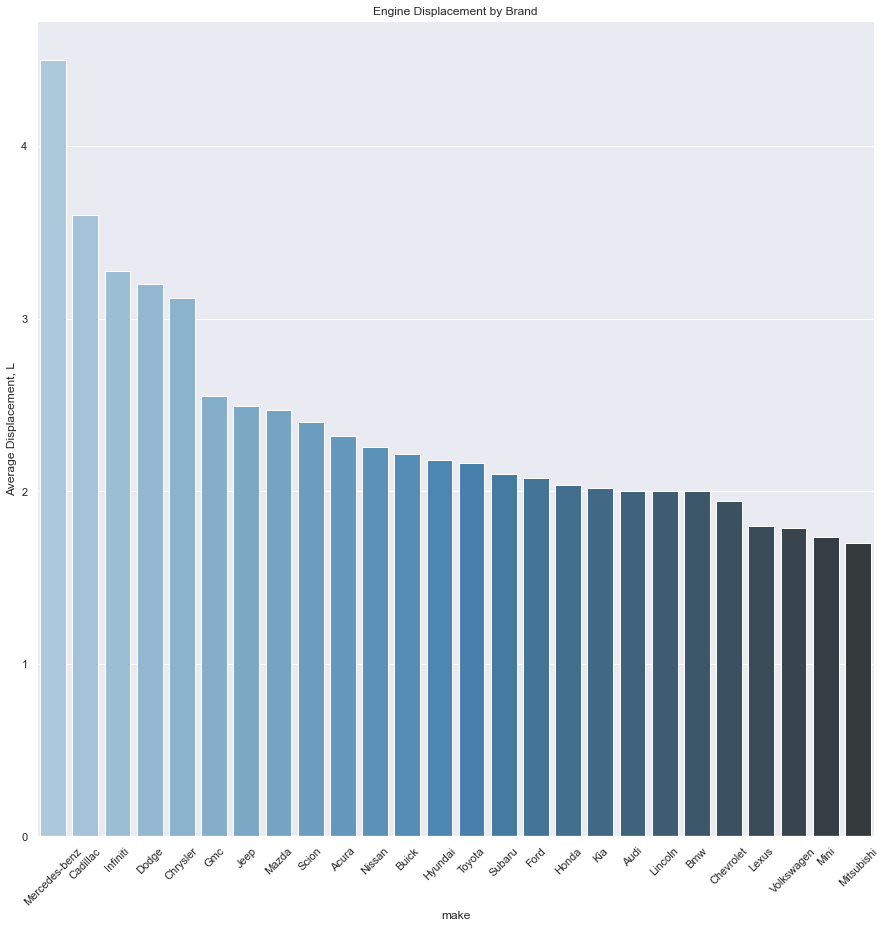

In [90]:
displacement = pd.DataFrame(carvana.groupby(['make'])['displacement'].agg('mean').sort_values(ascending=False)).transpose()

plt.figure(figsize=(15, 15))
sns.barplot(data=displacement, palette='Blues_d')
plt.xticks(rotation=45)
plt.title('Engine Displacement by Brand')
plt.ylabel('Average Displacement, L')
plt.show()

We have proven before that high-hp cars depreciate faster, and [most] of the luxury cars are _also_ high-powered cars, the exception is only BMW.
Again, big engine doesn't mean it's a muscle car: vans and pickup trucks have much bigger curb weight, therefore they need bigger engines. Mercedes is an absolute leader on this one, average displacement on their cars is the biggest.
So my assumption was almost correct, American brands go right after Mercedes.

# Most Common Car Brand and Model

Without further questions, let's find out the frequency of models and brands in this dataset:

In [91]:
carvana.make.value_counts().sort_values(ascending=False) # Nissan

Nissan           36
Ford             35
Kia              34
Chevrolet        32
Toyota           28
Hyundai          25
Honda            21
Jeep             19
Buick            19
Volkswagen       16
Dodge            10
Mazda            10
Acura             6
Subaru            6
Mitsubishi        5
Chrysler          5
Infiniti          4
Mini              3
Gmc               3
Bmw               3
Mercedes-benz     2
Audi              2
Lexus             2
Cadillac          1
Scion             1
Lincoln           1
Name: make, dtype: int64

In [92]:
carvana.model.value_counts().sort_values(ascending=False) #Honda Civic

Civic             12
Fusion            12
Corolla            9
Forte              9
Sonata             9
                  ..
A3                 1
Mirage             1
xB                 1
Veloster           1
Impala Limited     1
Name: model, Length: 120, dtype: int64

Looks like the most frequent brand is Nissan, but the most common car is Honda Civic. Let's visualize car brands by amount of cars in each:

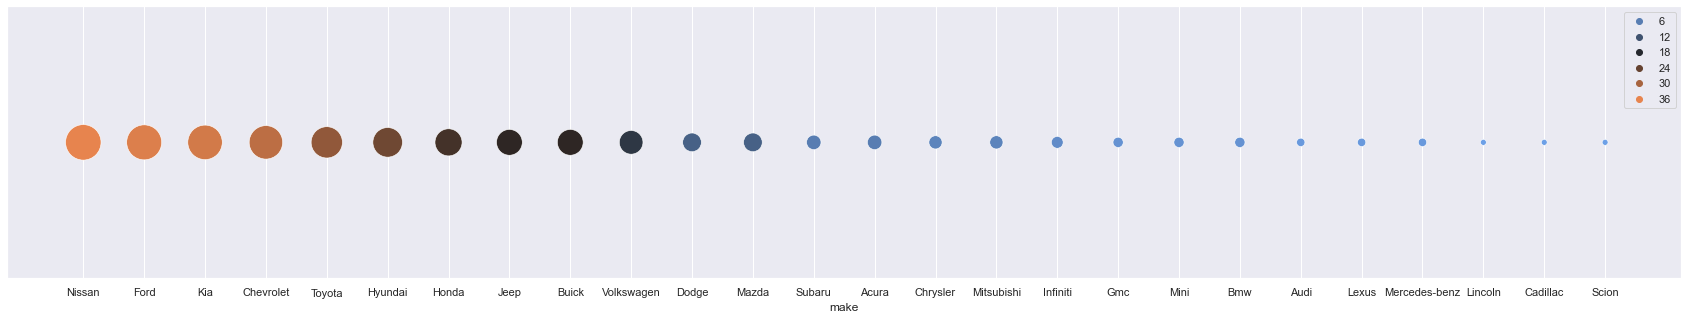

In [93]:
brands = pd.DataFrame(
    carvana.groupby(['make']).size().sort_values(ascending=False)).transpose()
#x,y = np.meshgrid(brands.columns, brands.index)
plt.figure(figsize=(30, 5))

sns.scatterplot(x=brands.columns,
                y=[0 for i in brands.columns],
                s=brands.loc[0] * 35,
                hue=carvana.groupby(['make'
                                     ]).size().sort_values(ascending=False),
                palette=sns.diverging_palette(250,
                                              30,
                                              l=65,
                                              center="dark",
                                              as_cmap=True))
plt.gca().axes.yaxis.set_visible(False) # hiding y labels
plt.show()

This plot shows amounts of cars of each brand in Carvana dataset. Brands after Hyndai have noticeably less cars than Nissan or Ford

# Drivetrain and Body Style

This will be an interesting question. 

Can we imply a body style from a drivetrain type? With a 100% possibility - unequivocally, no. For example, RWD is common amongst trucks, muscle cars, and vans.
However, can we say a car is a certain body type with some probability given a drivetrain, based on Carvana dataset? 

First, let's determine all possible drivetrain types:

In [94]:
carvana.drivetrain.unique()

array(['FWD', 'AWD', '2WD', '4WD', 'RWD'], dtype=object)

2WD is an ambigous thing. It can be both FWD or RWD. The rest is pretty self-explanatory. 

In [95]:
drivetrain_body = pd.crosstab(carvana.type, carvana.drivetrain, normalize='columns')
drivetrain_body = drivetrain_body.transpose()

drivetrain_body

type,Convertible,Coupe,Hatchback,Minivan,SUV,Sedan,Truck,Wagon
drivetrain,,,,,,,,
2WD,0.000,0.000000,0.000000,0.000000,0.789474,0.000000,0.210526,0.000000
4WD,0.000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
AWD,0.000,0.000000,0.030303,0.000000,0.666667,0.212121,0.000000,0.090909
FWD,0.000,0.007968,0.083665,0.007968,0.227092,0.637450,0.000000,0.035857
RWD,0.125,0.187500,0.125000,0.000000,0.062500,0.500000,0.000000,0.000000


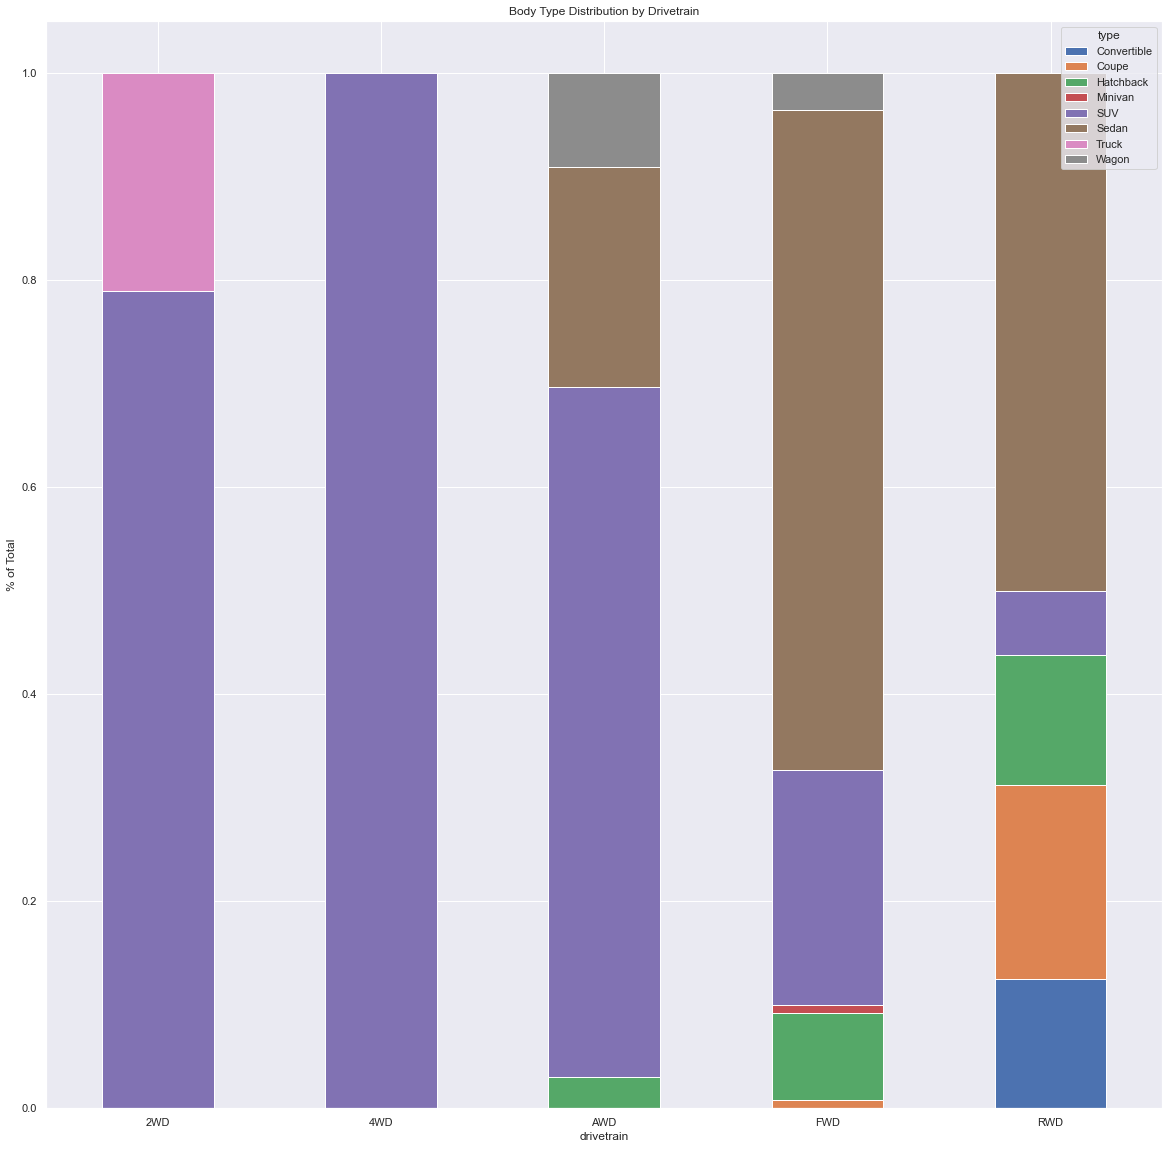

In [96]:

drivetrain_body.plot(kind='bar', stacked=True)
plt.title('Body Type Distribution by Drivetrain')
plt.ylabel(r'% of Total')
plt.xticks(rotation=0)
plt.show()

This visualization shows how many percent a certain body type occupy from a given drivetrain type. 

We can conclude that...
- if a car from this dataset is 4WD, it's an SUV.
- if it's a 2WD, the 79% chance it's an SUV, and 21% it's a truck
- the most common types for AWD drivetrain are SUV (67%), and Sedan (21%)
- FWD is dominated by Sedan (64%), and SUV (23%)
- exactly half of RWD cars are Sedans, and another 19% are Coupes. 


# Most Common Car Color

I will be using a treemap to display frequency of each car color in this dataset

In [97]:
carvana.color.value_counts()

Black       65
Gray        63
Silver      61
White       58
Red         34
Blue        26
Burgundy     7
Brown        4
Green        4
Gold         2
Beige        2
Orange       2
Purple       1
Name: color, dtype: int64

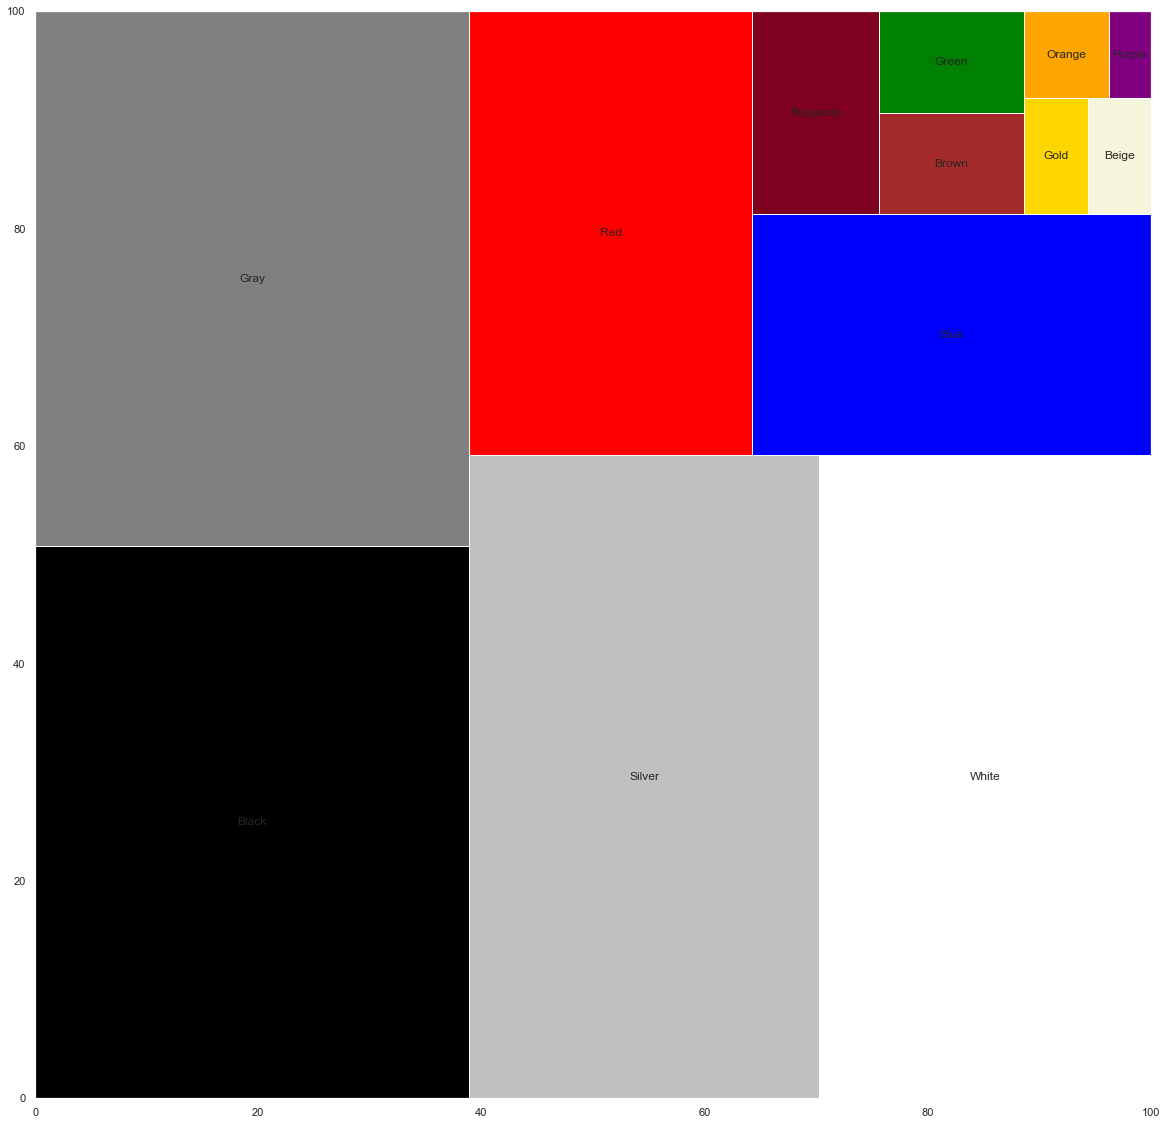

In [98]:
colors = carvana.color.value_counts()
colors = pd.DataFrame(colors).transpose()
sizes = list(colors.loc['color'])
labels = list(colors.columns)
color = ['black', 'gray', 'silver', 'white', 'red', 'blue', '#800020', 'brown', 'green', 'gold', 'beige', 'orange', 'purple']

squarify.plot(sizes=sizes, label=labels, color=color)
plt.show()


# Conclusion:

The most frequent car color in this dataset is indeed black, my assumption was correct. The most common colors are shades of gray: gray, white, black, and silver. Other colors occupy only about 25% of the total population.

# The Cheapest and The Most Expensive Cars

I'm not going to make a plot for this one, just a quick check:

In [99]:
carvana.loc[carvana.price == carvana.price.min()]

,url,id,make,model,price,year,type,status,mileage,trim,scraped_at,address,city,state,zip,mpg_city,mpg_hwy,cylinders_count,engine,horsepower,torque,fuel_type,drivetrain,color,transmission,doors,seats,vin,stock_number,curb_weight,msrp,displacement,transmission_type,depreciation_rate
8,https://www.carvana.com/vehicle/1994314,1994314,Chevrolet,Spark,12990,2014,Hatchback,Available,38221,LS Hatchback 4D,2021-10-09 13:11:30,1925 Concord Pkwy S,Concord,NC,28027,31.0,39.0,4.0,"4-Cyl, ECOTEC, 1.2 Liter",84.0,83.0,Gas,FWD,White,"Manual, 5-Spd",4,4,KL8CA6S94EC592851,2001274646,2368.0,14305,1.2,manual,-1.368116


The cheapest car is '14 Chevrolet Spark. Looks like it doesn't have a lot of horsepower, what is the reason of it being so cheap? 

- cheaply made, marketed as a cheap throw-away car
- a lot of mechanical problems
- no horsepower (horsepower matters, according our previous findings!)
- no demand for it

What about the most expensive car?

In [100]:
max_price = carvana.loc[carvana.price == carvana.price.max()]
max_price

,url,id,make,model,price,year,type,status,mileage,trim,scraped_at,address,city,state,zip,mpg_city,mpg_hwy,cylinders_count,engine,horsepower,torque,fuel_type,drivetrain,color,transmission,doors,seats,vin,stock_number,curb_weight,msrp,displacement,transmission_type,depreciation_rate
19,https://www.carvana.com/vehicle/1994133,1994133,Mazda,CX-5,24990,2019,SUV,Available,57606,Touring Sport Utility 4D,2021-10-09 13:11:58,1951 Morgan Rd,Bessemer,AL,35022,25.0,31.0,4.0,"4-Cyl, SKYACTIV-G, 2.5 Liter",187.0,186.0,Gas,FWD,Black,"Automatic, 6-Spd SKYACTIV-Drive w/Manual & Spo...",4,5,JM3KFACMXK1551309,2001262124,3541.0,27660,2.5,automatic,-4.948923
23,https://www.carvana.com/vehicle/1958467,1958467,Mercedes-benz,E-Class,24990,2015,Sedan,Available,70006,E 350 4MATIC Sedan 4D,2021-10-09 13:12:09,1925 Concord Pkwy S,Concord,NC,28027,20.0,28.0,6.0,"V6, 3.5 Liter",302.0,273.0,Gas,AWD,White,"Auto, 7-Spd Spt & Economy",4,5,WDDHF8JB8FB124634,2001233190,3979.0,69365,3.5,automatic,-15.646266
34,https://www.carvana.com/vehicle/1994396,1994396,Nissan,Murano,24990,2016,SUV,Available,16387,S Sport Utility 4D,2021-10-09 13:13:42,1123 Cantrell Sansom Rd,Blue Mound,TX,76131,21.0,28.0,6.0,"V6, 3.5 Liter",260.0,240.0,Gas,AWD,Silver,"Automatic, Xtronic CVT",4,5,5N1AZ2MH7GN165946,2001265139,3920.0,33060,3.5,automatic,-5.443219
35,https://www.carvana.com/vehicle/1866954,1866954,Nissan,Frontier King Cab,24990,2019,Truck,Available,21292,S Pickup 2D 6 ft,2021-10-09 13:13:44,1123 Cantrell Sansom Rd,Blue Mound,TX,76131,17.0,22.0,4.0,"4-Cyl, 2.5 Liter",NaN,NaN,Gas,2WD,White,"Automatic, 5-Spd",2,4,1N6BD0CT7KN763672,2001102040,3798.0,24255,NaN,automatic,1.503844
38,https://www.carvana.com/vehicle/2000473,2000473,Buick,Regal Sportback,24990,2018,Sedan,Available,28973,Essence Sedan 4D,2021-10-09 13:13:52,1123 Cantrell Sansom Rd,Blue Mound,TX,76131,22.0,32.0,4.0,"4-Cyl, Turbo, 2.0 Liter",250.0,260.0,Gas,FWD,Gray,"Automatic, 9-Spd",4,5,W04GP6SX0J1092160,2001287052,3902.0,32655,2.0,automatic,-8.531367
41,https://www.carvana.com/vehicle/1887513,1887513,Buick,Regal TourX,24990,2018,Wagon,Available,73566,Essence Wagon 4D,2021-10-09 13:13:58,63 Pierce Rd,Winder,GA,30680,21.0,29.0,4.0,"4-Cyl, Turbo, 2.0 Liter",250.0,295.0,Gas,AWD,Red,"Automatic, 8-Spd",4,5,W04GV8SX6J1157109,2001144754,4286.0,35945,2.0,automatic,-11.411791
57,https://www.carvana.com/vehicle/1959361,1959361,Mercedes-benz,S-Class,24990,2011,Sedan,Available,75392,S 550 Sedan 4D,2021-10-09 13:15:39,1925 Concord Pkwy S,Concord,NC,28027,15.0,23.0,8.0,"V8, 5.5 Liter",382.0,391.0,Gas,RWD,White,"Auto, 7-Spd Touch Shift",4,5,WDDNG7BB0BA402239,2001230590,4455.0,94525,5.5,automatic,-12.456893
109,https://www.carvana.com/vehicle/1993956,1993956,Jeep,Renegade,24990,2018,SUV,Available,27269,Limited Sport Utility 4D,2021-10-09 13:20:56,63 Pierce Rd,Winder,GA,30680,21.0,29.0,4.0,"4-Cyl, MultiAir, 2.4L",180.0,175.0,Gas,4WD,Gray,"Automatic, 9-Spd",4,5,ZACCJBDBXJPH44508,2001276645,3327.0,28240,2.4,automatic,-3.993526
110,https://www.carvana.com/vehicle/1999119,1999119,Dodge,Durango,24990,2017,SUV,Available,82229,SXT Sport Utility 4D,2021-10-09 13:20:58,1123 Cantrell Sansom Rd,Blue Mound,TX,76131,19.0,26.0,6.0,"V6, 3.6 Liter",NaN,NaN,Gas,RWD,Gray,"Automatic, 8-Spd",4,7,1C4RDHAG0HC869889,2001264487,4913.0,33690,NaN,automatic,-7.196082
118,https://www.carvana.com/vehicle/1869611,1869611,Honda,Civic,24990,2018,Sedan,Available,21807,EX Sedan 4D,2021-10-09 13:21:18,1123 Cantrell Sansom Rd,Blue Mound,TX,76131,31.0,40.0,4.0,"4-Cyl, i-VTEC, 2.0 Liter",NaN,NaN,Gas,FWD,Gray,"Automatic, CVT",4,5,2HGFC2F7XJH559975,2001064483,2795.0,22235,NaN,automatic,3.970398


It catches my eye that a lot of entirely different cars have a matching maximum price. That could be an indication of two things:
- this dataset was originally retrieved with a condition from 0 to 25000 or so
- Carvana has a limit on max car price, which i doubt. 

What would be the best option for that price? We will consider mileage and year.

First, lets see how many miles go for 1 year in span of all the vehicles for that price:

In [101]:
coeff = (max_price.mileage.max() - max_price.mileage.min())/(max_price.year.max() - max_price.year.min()) 

We are interested to select a car that is the newest, but has the lowest mileage. For that matter, we will be subtracting from year mileage divided by the yearly coefficient. Thus, the more miles, the 'older' the car will be with newly calculated 'adjusted' year. 

In [102]:
max_price['new_year'] = max_price.year - (max_price.mileage / coeff)
max_price[max_price.new_year == max_price.new_year.max()]

C:\Users\Компьютер\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,url,id,make,model,price,year,type,status,mileage,trim,scraped_at,address,city,state,zip,mpg_city,mpg_hwy,cylinders_count,engine,horsepower,torque,fuel_type,drivetrain,color,transmission,doors,seats,vin,stock_number,curb_weight,msrp,displacement,transmission_type,depreciation_rate,new_year
208,https://www.carvana.com/vehicle/1997764,1997764,Nissan,Frontier King Cab,24990,2018,Truck,Available,1994,S Pickup 2D 6 ft,2021-10-09 13:29:09,1123 Cantrell Sansom Rd,Blue Mound,TX,76131,19.0,23.0,4.0,"4-Cyl, 2.5 Liter",NaN,NaN,Gas,2WD,Black,"Manual, 5-Spd",2,4,1N6BD0CT4JN758220,2001284265,3803.0,23705,2.5,manual,1.775231,2017.801184


Seems about right, this is the best choice for mileage and year. 

In [103]:
max_price[max_price.new_year == max_price.new_year.min()]

,url,id,make,model,price,year,type,status,mileage,trim,scraped_at,address,city,state,zip,mpg_city,mpg_hwy,cylinders_count,engine,horsepower,torque,fuel_type,drivetrain,color,transmission,doors,seats,vin,stock_number,curb_weight,msrp,displacement,transmission_type,depreciation_rate,new_year
57,https://www.carvana.com/vehicle/1959361,1959361,Mercedes-benz,S-Class,24990,2011,Sedan,Available,75392,S 550 Sedan 4D,2021-10-09 13:15:39,1925 Concord Pkwy S,Concord,NC,28027,15.0,23.0,8.0,"V8, 5.5 Liter",382.0,391.0,Gas,RWD,White,"Auto, 7-Spd Touch Shift",4,5,WDDNG7BB0BA402239,2001230590,4455.0,94525,5.5,automatic,-12.456893,2003.482882


And this is the worst choice on the given criteria, but again - Mercedes, that's why. There are other than mileage and year factors that contribute to the price of that car. 

# Min and Max Price For Each Brand

Now, the task is to determine cheapest and the most expensive car for each manufacturer. 

These are the cheapest cars for each brand:

In [104]:
cheapest_per_brand = carvana.groupby(['make'])['id', 'price'].agg('min')
carvana[carvana.id.isin(cheapest_per_brand.id)]

C:\Users\Компьютер\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,url,id,make,model,price,year,type,status,mileage,trim,scraped_at,address,city,state,zip,mpg_city,mpg_hwy,cylinders_count,engine,horsepower,torque,fuel_type,drivetrain,color,transmission,doors,seats,vin,stock_number,curb_weight,msrp,displacement,transmission_type,depreciation_rate
1,https://www.carvana.com/vehicle/1834140,1834140,Nissan,Altima,17590,2015,Sedan,Available,55648,2.5 SV Sedan 4D,2021-10-09 13:10:10,1951 Morgan Rd,Bessemer,AL,35022,27.0,38.0,4.0,"4-Cyl, 2.5 Liter",NaN,NaN,Gas,FWD,Black,"Automatic, Xtronic CVT",4,5,1N4AL3AP6FC104658,2001064426,3206.0,25555,NaN,automatic,-6.035244
23,https://www.carvana.com/vehicle/1958467,1958467,Mercedes-benz,E-Class,24990,2015,Sedan,Available,70006,E 350 4MATIC Sedan 4D,2021-10-09 13:12:09,1925 Concord Pkwy S,Concord,NC,28027,20.0,28.0,6.0,"V6, 3.5 Liter",302.0,273.0,Gas,AWD,White,"Auto, 7-Spd Spt & Economy",4,5,WDDHF8JB8FB124634,2001233190,3979.0,69365,3.5,automatic,-15.646266
32,https://www.carvana.com/vehicle/1799844,1799844,Dodge,Journey,22990,2020,SUV,Available,31299,SE Value Sport Utility 4D,2021-10-09 13:13:36,63 Pierce Rd,Winder,GA,30680,19.0,25.0,4.0,"4-Cyl, 2.4 Liter",NaN,NaN,Gas,FWD,White,"Automatic, 4-Spd w/AutoStick",4,7,3C4PDCAB4LT199212,2000964613,NaN,25170,NaN,automatic,-8.661104
46,https://www.carvana.com/vehicle/1821702,1821702,Kia,Forte,19590,2019,Sedan,Available,42764,FE Sedan 4D,2021-10-09 13:15:12,1123 Cantrell Sansom Rd,Blue Mound,TX,76131,31.0,41.0,4.0,"4-Cyl, 2.0 Liter",NaN,NaN,Gas,FWD,Gray,"Automatic, i-CVT",4,5,3KPF24ADXKE076123,2001049415,2903.0,19615,NaN,automatic,-0.063747
86,https://www.carvana.com/vehicle/2027557,2027557,Cadillac,XTS,21990,2014,Sedan,Available,64654,Luxury Collection Sedan 4D,2021-10-09 13:18:54,1123 Cantrell Sansom Rd,Blue Mound,TX,76131,18.0,28.0,6.0,"V6, 3.6 Liter",304.0,264.0,Gas,FWD,Gold,"Automatic, 6-Spd",4,5,2G61M5S31E9319937,2001318895,4006.0,51230,3.6,automatic,-11.380622
98,https://www.carvana.com/vehicle/1967937,1967937,Audi,A3,23590,2016,Sedan,Available,44929,2.0T Premium Sedan 4D,2021-10-09 13:19:24,1925 Concord Pkwy S,Concord,NC,28027,24.0,33.0,4.0,"4-Cyl, Turbo, 2.0 Liter",NaN,NaN,Gas,AWD,Silver,"Auto, 6-Spd S Tronic",4,5,WAUB8GFF7G1117565,2001192472,3362.0,35125,NaN,automatic,-7.653100
114,https://www.carvana.com/vehicle/1864588,1864588,Buick,Encore,21990,2017,SUV,Available,17312,Sport Utility 4D,2021-10-09 13:21:06,63 Pierce Rd,Winder,GA,30680,25.0,33.0,4.0,"4-Cyl, ECOTEC, 1.4T",NaN,NaN,Gas,FWD,Blue,"Auto, 6-Spd OD ShftCtrl",4,5,KL4CJ3SB4HB156529,2001083446,3237.0,23915,NaN,automatic,-2.076098
138,https://www.carvana.com/vehicle/1993222,1993222,Infiniti,Q50,22990,2015,Sedan,Available,60514,3.7 Premium Sedan 4D,2021-10-09 13:23:07,1951 Morgan Rd,Bessemer,AL,35022,20.0,29.0,6.0,"V6, 3.7 Liter",328.0,269.0,Gas,RWD,Gray,"Auto, 7-Spd Rev Match",4,5,JN1BV7APXFM355423,2001271931,3611.0,42305,3.7,automatic,-9.664619
151,https://www.carvana.com/vehicle/1959353,1959353,Mazda,CX-9,16990,2014,SUV,Available,100259,Touring Sport Utility 4D,2021-10-09 13:24:44,1951 Morgan Rd,Bessemer,AL,35022,16.0,22.0,6.0,"V6, 3.7 Liter",273.0,270.0,Gas,AWD,Gray,"Auto, 6-Spd w/Sptshft",4,7,JM3TB3CV7E0438822,2001211705,4559.0,35425,3.7,automatic,-9.964883
158,https://www.carvana.com/vehicle/1856727,1856727,Ford,Fusion,20990,2018,Sedan,Available,51874,SE Hybrid Sedan 4D,2021-10-09 13:25:01,63 Pierce Rd,Winder,GA,30680,43.0,41.0,4.0,"4-Cyl, Hybrid, 2.0 Liter",NaN,NaN,Hybrid,FWD,Gray,"Automatic, eCVT",4,5,3FA6P0LU0JR248888,2001092503,3660.0,28025,NaN,automatic,-9.185414


And these are the most expensive:

In [105]:
cheapest_per_brand = carvana.groupby(['make'])['id', 'price'].agg('max')
carvana.loc[carvana.id.isin(cheapest_per_brand.id)]

C:\Users\Компьютер\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,url,id,make,model,price,year,type,status,mileage,trim,scraped_at,address,city,state,zip,mpg_city,mpg_hwy,cylinders_count,engine,horsepower,torque,fuel_type,drivetrain,color,transmission,doors,seats,vin,stock_number,curb_weight,msrp,displacement,transmission_type,depreciation_rate
13,https://www.carvana.com/vehicle/2035411,2035411,Subaru,Impreza,22990,2019,Wagon,Available,12744,2.0i Wagon 4D,2021-10-09 13:11:43,63 Pierce Rd,Winder,GA,30680,28.0,36.0,4.0,"4-Cyl, 2.0 Liter",152.0,145.0,Gas,AWD,Red,"Automatic, CVT w/Lineartronic & Manual Modes",4,5,4S3GTAB65K3727116,2001279137,3047.0,20980,2.0,automatic,4.680730
28,https://www.carvana.com/vehicle/2032382,2032382,Infiniti,Q40,20590,2015,Sedan,Available,52245,Sedan 4D,2021-10-09 13:13:26,1123 Cantrell Sansom Rd,Blue Mound,TX,76131,19.0,27.0,6.0,"V6, 3.7 Liter",328.0,269.0,Gas,RWD,Black,"Auto, 7-Spd Rev Match",4,5,JN1CV6AP2FM502414,2001306556,3821.0,37455,3.7,automatic,-9.491141
49,https://www.carvana.com/vehicle/2035924,2035924,Chevrolet,Equinox,23990,2018,SUV,Available,32144,LT Sport Utility 4D,2021-10-09 13:15:20,1951 Morgan Rd,Bessemer,AL,35022,26.0,32.0,4.0,"4-Cyl, Turbo, 1.5 Liter",170.0,203.0,Gas,FWD,Gray,"Automatic, 6-Spd w/Overdrive",4,5,3GNAXJEV0JS622609,2001256703,3325.0,27695,1.5,automatic,-4.674383
53,https://www.carvana.com/vehicle/2004356,2004356,Acura,ILX,19990,2015,Sedan,Available,45843,Sedan 4D,2021-10-09 13:15:29,1123 Cantrell Sansom Rd,Blue Mound,TX,76131,24.0,35.0,4.0,"4-Cyl, i-VTEC, 2.0 Liter",150.0,140.0,Gas,FWD,White,"Auto, 5-Spd Seq SptShft",4,5,19VDE1F78FE001628,2001291309,2955.0,27990,2.0,automatic,-5.455780
57,https://www.carvana.com/vehicle/1959361,1959361,Mercedes-benz,S-Class,24990,2011,Sedan,Available,75392,S 550 Sedan 4D,2021-10-09 13:15:39,1925 Concord Pkwy S,Concord,NC,28027,15.0,23.0,8.0,"V8, 5.5 Liter",382.0,391.0,Gas,RWD,White,"Auto, 7-Spd Touch Shift",4,5,WDDNG7BB0BA402239,2001230590,4455.0,94525,5.5,automatic,-12.456893
69,https://www.carvana.com/vehicle/2024324,2024324,Mini,Hardtop,16590,2012,Hatchback,Available,60968,Cooper S Hatchback 2D,2021-10-09 13:17:10,1123 Cantrell Sansom Rd,Blue Mound,TX,76131,27.0,35.0,4.0,"4-Cyl, Turbo, 1.6 Liter",181.0,177.0,Gas,FWD,Gray,"Manual, 6-Spd",2,4,WMWSV3C51CTY27430,2001313778,2668.0,24550,1.6,manual,-4.261125
76,https://www.carvana.com/vehicle/2036039,2036039,Kia,Forte,18590,2018,Sedan,Available,21567,LX Sedan 4D,2021-10-09 13:17:27,63 Pierce Rd,Winder,GA,30680,25.0,34.0,4.0,"4-Cyl, 2.0 Liter",147.0,132.0,Gas,FWD,Black,"Manual, 6-Spd",4,5,3KPFK4A72JE247858,2001315800,2928.0,18045,2.0,manual,0.996774
82,https://www.carvana.com/vehicle/2035498,2035498,Mazda,CX-5,18990,2014,SUV,Available,79417,Grand Touring Sport Utility 4D,2021-10-09 13:18:44,1420 Toshiba Dr,Lebanon,TN,37087,24.0,30.0,4.0,"4-Cyl, SKYACTIV-G, 2.5L",184.0,185.0,Gas,AWD,Red,"Auto, 6-Spd w/MM",4,5,JM3KE4DY8E0421593,2001330174,3375.0,29900,2.5,automatic,-6.279142
86,https://www.carvana.com/vehicle/2027557,2027557,Cadillac,XTS,21990,2014,Sedan,Available,64654,Luxury Collection Sedan 4D,2021-10-09 13:18:54,1123 Cantrell Sansom Rd,Blue Mound,TX,76131,18.0,28.0,6.0,"V6, 3.6 Liter",304.0,264.0,Gas,FWD,Gold,"Automatic, 6-Spd",4,5,2G61M5S31E9319937,2001318895,4006.0,51230,3.6,automatic,-11.380622
113,https://www.carvana.com/vehicle/2035763,2035763,Hyundai,Sonata,15990,2013,Sedan,Available,47425,GLS Sedan 4D,2021-10-09 13:21:05,63 Pierce Rd,Winder,GA,30680,24.0,35.0,4.0,"4-Cyl, 2.4 Liter",NaN,NaN,Gas,FWD,Black,"Auto, 6-Spd wShiftronic & Active ECO System",4,5,5NPEB4AC2DH657178,2001320394,3316.0,21670,2.4,automatic,-3.728288


# MPG Analysis:

Finally, which car brand is the most efficient in terms of fuel? 

We will have three categories:  the most efficient in the city, the most efficient on the highway, and the most efficient in combined MPG. 

The combined MPG is not included in the dataset, so we have to calculate this column, using the formula, according to www.epa.gov:

### $$CombinedMPG = \frac{1}{\frac{.55}{CityMPG} + \frac{.45}{HwyMPG}}$$


In [106]:
# calculating combined MPG
carvana['mpg_combined'] = (.55/carvana.mpg_city + .45/carvana.mpg_hwy)**(-1)

In [107]:
# calculating efficiency for each type of MPG
efficiency_city = carvana.groupby(['make'])['mpg_city'].mean().sort_values()
efficiency_hwy = carvana.groupby(['make'])['mpg_hwy'].mean().sort_values()
efficiency_combined = carvana.groupby(['make'])['mpg_combined'].mean().sort_values()

In [108]:
# assembling everything into a table
efficiency = pd.concat([efficiency_city, efficiency_hwy, efficiency_combined], axis=1).sort_values(by=['mpg_combined'], ascending=False)
efficiency

,mpg_city,mpg_hwy,mpg_combined
make,,,
Honda,28.857143,37.714286,32.260892
Lexus,31.000000,33.000000,31.607693
Mitsubishi,28.200000,34.400000,30.683623
Toyota,27.555556,35.185185,30.484859
Subaru,26.200000,34.600000,29.407759
Volkswagen,25.687500,35.625000,29.355066
Hyundai,25.560000,34.960000,29.054885
Kia,25.764706,33.970588,28.879363
Nissan,25.722222,33.722222,28.767228


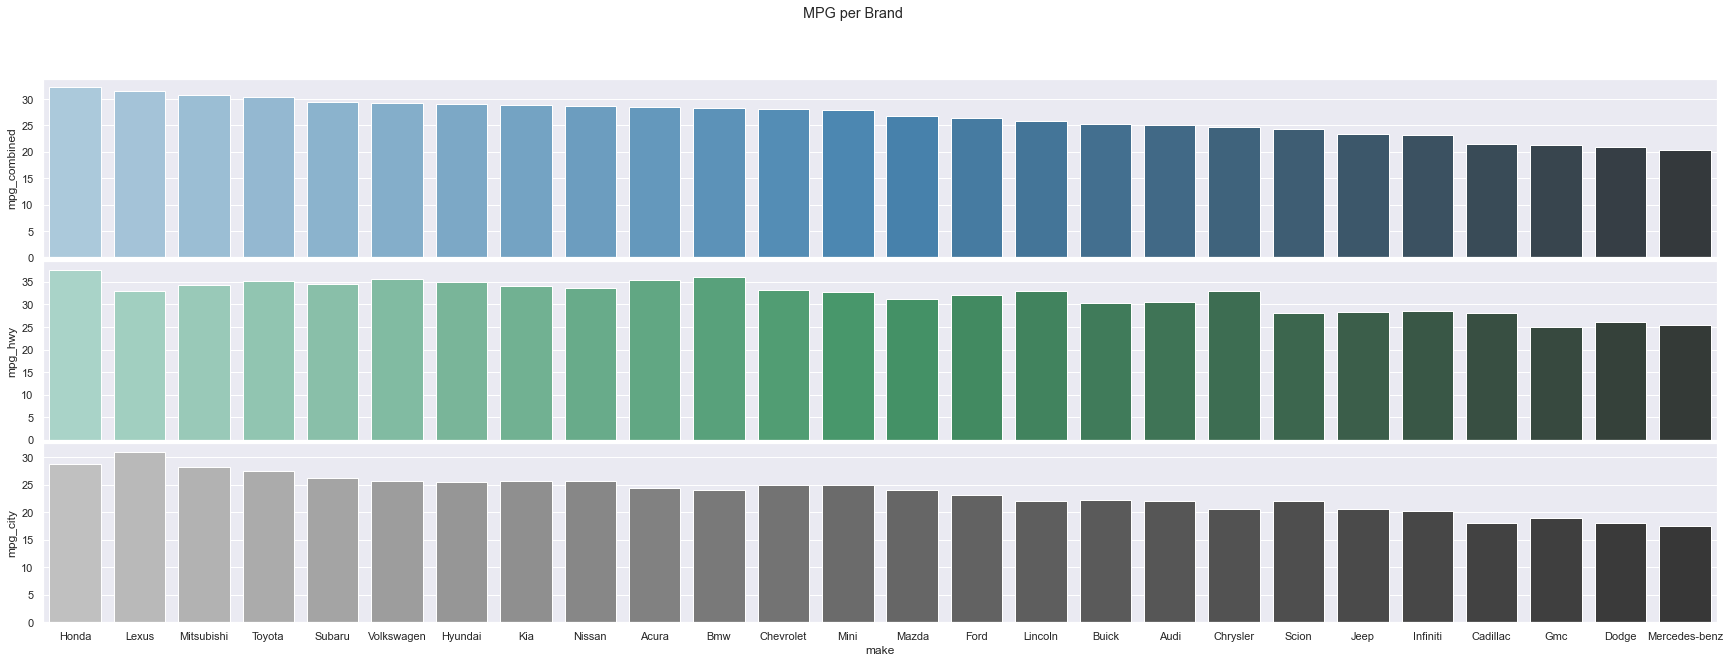

In [109]:
# creating a plot
fig_f, axs = plt.subplots(3, figsize=(30, 10), sharex='all')
sns.barplot(x=efficiency.index, y=efficiency.mpg_city, ax=axs[2], palette='Greys_d')
sns.barplot(x=efficiency.index, y=efficiency.mpg_hwy, ax=axs[1], palette='BuGn_d')
sns.barplot(x=efficiency.index, y=efficiency.mpg_combined, ax=axs[0], palette='Blues_d')
axs[0].get_xaxis().set_visible(False)
axs[1].get_xaxis().set_visible(False)
plt.subplots_adjust(hspace=0.02)
plt.suptitle('MPG per Brand')
plt.show()

Based on this graph, it's clear that Honda is the most efficient brand in terms of Combined MPG. It is also the most efficient brand in Highway MPG, and only loses to Lexus in City MPG, being #2 in this category. As we remember from the past findings, fuel efficiency affects the price too.

# Side questions:

### We noticed on one of the plots that more recent cars tend to have lesser curb weight. 
This can be a result of multiple factors, for example, there are less SUVs and Trucks on Carvana that are new. Let's find out if the curb weight of newer cars is lesser than the older ones:

In [110]:
# average weights by Year
carvana.groupby(['year'])['curb_weight'].mean().sort_values(ascending=False)

year
2011    4455.000000
2014    3549.315789
2015    3530.973684
2012    3529.600000
2013    3412.714286
2016    3356.538462
2010    3314.000000
2018    3313.327869
2017    3312.309091
2019    3088.128205
2020    2871.285714
2021    2826.000000
Name: curb_weight, dtype: float64

Seems like there is indeed lesser average weight of a car built in 2020 or 2021. Is there a reason for it?

In [111]:
# average weights by Type
carvana.groupby(['type'])['curb_weight'].mean().sort_values(ascending=False)

type
Minivan        4510.000000
Truck          3802.750000
Convertible    3630.000000
SUV            3621.877551
Coupe          3502.500000
Wagon          3258.636364
Sedan          3174.132075
Hatchback      2843.695652
Name: curb_weight, dtype: float64

### Why Convertibles are especially so heavy? Aren't they like Sedan or Coupe type?

Convertibles have a soft fabric roof. In case of a Coupe, which is probably the closest type similar to Convertible, the body of the car is rigid because of the chassis part as well as roof. In case of convertible, the roof cannot be a rigid linkage, therefore the body is heavily reinforced from the bottom, which makes the overall weight higher.

### Coupe is heaver than a Wagon. How is that possible? 

Returning back to Correlation Matrix above, I noticed a peculiar detail. Seems like there is a strong correlation (0.73) between **displacement** and **curb_weight**. There is also a strong negative correlation (-0.75) for a **hwy_mpg** and **curb_weight**, meaning low-MPG cars tend to weight more. Apparently, the body type of the car isn't the only thing that affects it's weight.

In [112]:
carvana.groupby(['year'])['displacement'].mean().sort_values(ascending=False)

year
2011    5.500000
2010    3.700000
2014    2.600000
2015    2.578378
2013    2.542857
2012    2.480000
2016    2.190698
2018    2.105769
2017    1.983784
2019    1.977419
2021    1.800000
2020    1.658333
Name: displacement, dtype: float64

<AxesSubplot:xlabel='year', ylabel='curb_weight'>

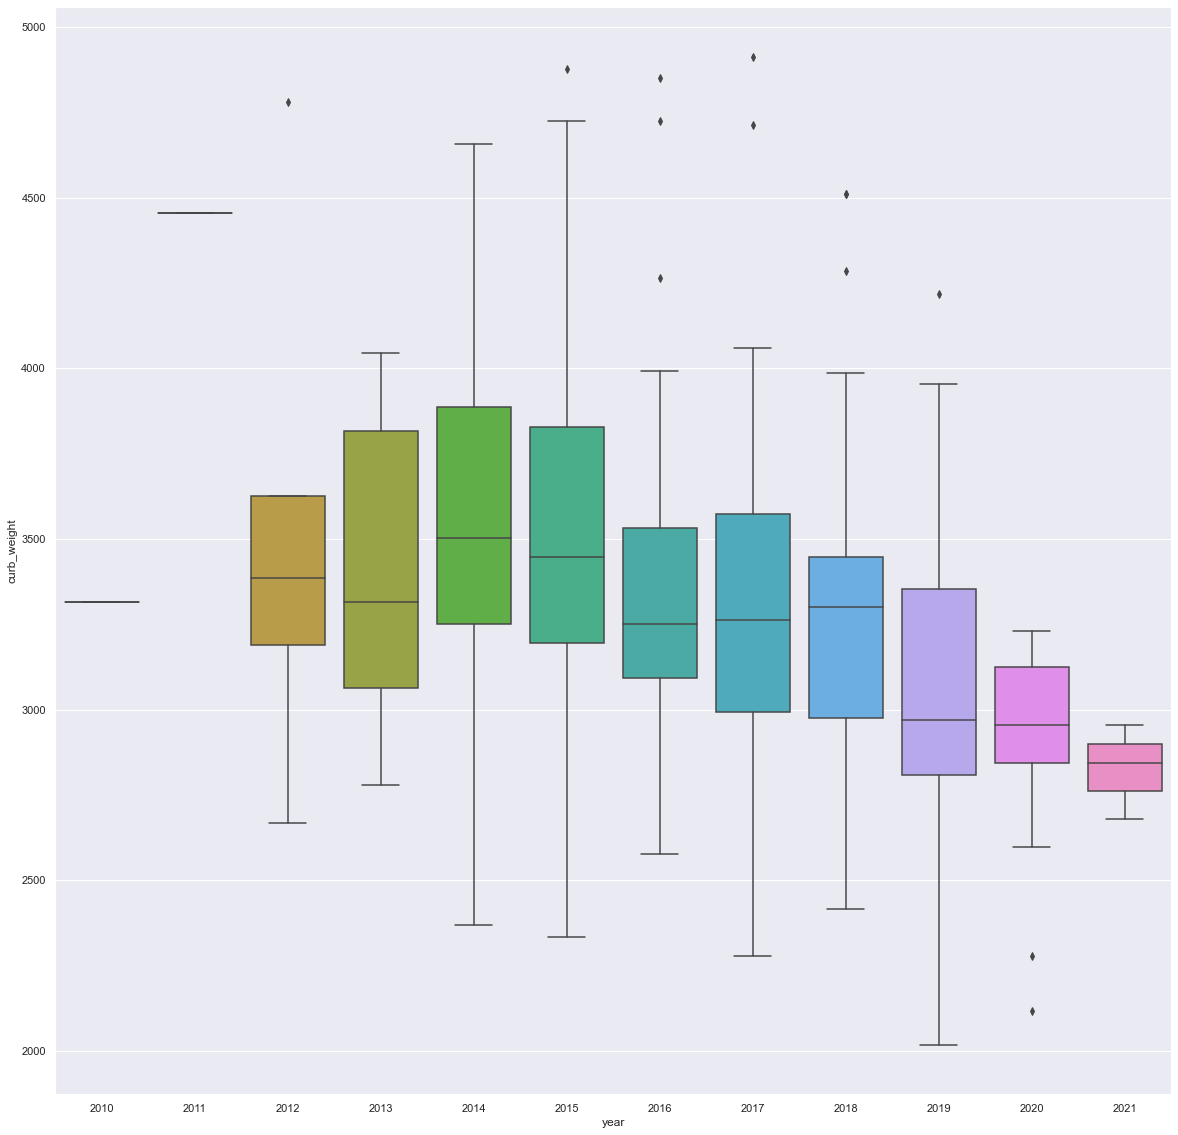

In [113]:
sns.boxplot(data=carvana, x='year', y='curb_weight')

Looking at this graph, we can see a noticeable decrease in curb weight after 2018. Cars from 2014-2015 tend to have higher average curb weight, which also correlates with displacement data: cars from both 2014 and 2015 are on a high-end of engine displacements. 

### Conclusion: 
Engine is a big chunk of metal that makes up a decent part of car's overall weight. The bigger the displacement of an enigine, the more cylinders it has, the more it weighs. In this dataset, cars from 2020-2021 have smaller engines on average compared to the rest of years. 

## Average Mileage by Year

We have a hypothesis that 2016-2018 years have higher average mileage than the rest of the cars.  Let's see if it's true:

In [114]:
carvana.groupby(['year'])['mileage'].mean().sort_values(ascending=False)

year
2011    75392.000000
2012    73170.200000
2010    67816.000000
2013    58873.312500
2014    56581.476190
2015    55059.568182
2017    46082.175439
2016    45543.909091
2018    43003.205882
2019    35871.175000
2020    26540.222222
2021    10769.000000
Name: mileage, dtype: float64

In [115]:
# Calculating Grand Mean:
carvana.mileage.mean().mean()

45782.85410334347

In [116]:
years = [2016, 2017, 2018]

print('2016-2018', carvana[carvana.year.isin(years)]['mileage'].mean())
print('the rest', carvana.loc[~carvana.year.isin(years)]['mileage'].mean()) # '~' in front of the column filter is a negation

2016-2018 44754.53888888889
the rest 47025.11409395973


### Colclusion
We can conclude that our assumption was incorrect

# Overall Conclusion:
For this dataset:

- mileage isn't the first parameter that affects the price of the car
- manual transmission cars cost on average less than automatic transmission cars
- the more horspower the car has, the higher is the depreciation rate, on average
- modern American Carvana market is steered towards less expensive, fuel efficient Japanese cars (Honda, Nissan), even though customers are ready to pay more for increased horsepower.
- more pragmatic colors  (shades of gray) are highly popular, other than grayscale colors make up a smaller percentage
- the engine size contributes greatly to the overall weight of the car   